# Линейная регрессия и стохастический градиентный спуск

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$.


**Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.**

## Инструкции по выполнению

### Описание данных
В домашней работе вы будете работать с набором данных "advertising". Этот набор данных отражает выручку от продаж,
полученную с учетом затрат на рекламу по нескольким каналам, таким как радио(Radio), телевидение(TV) и газеты(Newspaper).
Ваша задача научиться прогнозировать эту выручку(Sales).

### Задание 1 [3 балла]

**Загрузите данные из файла *advertising.csv* в объект pandas DataFrame.**

In [248]:
import pandas as pd
advertising_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.** 

In [249]:
advertising_data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [250]:
advertising_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте матрицу признаков NumPy *X* из столбцов TV, Radio и Newspaper и массив *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [251]:
X = advertising_data[["TV", "Radio", "Newspaper"]].values
y = advertising_data[["Sales"]].values


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [252]:
import numpy as np
means, stds = np.mean(X, axis=0), np.std(X, axis=0)

In [253]:
X = (X - means) / stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [254]:
X = np.hstack([X, np.ones((X.shape[0], 1))]) # reshape ? shape

### Задание 2 [3 балла]

**Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.** 

In [255]:
def mserror(y, y_pred):
    return np.sum((y-y_pred) ** 2)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Округлите ответ до 3 знаков после запятой.**

In [256]:
median_predict = np.array([np.median(y)]*y.shape[0]).reshape((y.shape[0], 1))
answer1 = mserror(y, median_predict)
print(answer1)

5669.15


### Задание 3 [3 балла]

**Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [257]:
def normal_equation(X, y):
    return np.dot(np.linalg.pinv(X),y)

In [258]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[ 3.91925365]
 [ 2.79206274]
 [-0.02253861]
 [14.0225    ]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Округлите ответ до 3 знаков после запятой.**

In [259]:
answer2 = round(np.dot(np.mean(X, axis=0), norm_eq_weights)[0], 3)
print(answer2)

14.022


### Задание 4 [5 баллов]

**Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов.**

In [260]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат округлите до 3 знаков после запятой.**

In [261]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print("%.3f" % answer3)

556.825


**Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.** 

In [262]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = 2 * (np.dot(X[train_ind], w) - y[train_ind]) * X[train_ind, 0]
    grad1 = 2 * (np.dot(X[train_ind], w) - y[train_ind]) * X[train_ind, 1]
    grad2 = 2 * (np.dot(X[train_ind], w) - y[train_ind]) * X[train_ind, 2]
    grad3 = 2 * (np.dot(X[train_ind], w) - y[train_ind]) * X[train_ind, 3]
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

### Задание 5 [6 баллов]

**Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)

**На каждой итерации в список (errors) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также список (errors) ошибок.**

In [263]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4):

  max_weight_dist = np.inf
  min_weight_dist = 1e-8 #- np.inf
  w = w_init
  errors = []
  iter_counter = 0
  np.random.seed(42)
        
  while max_weight_dist > min_weight_dist and iter_counter < max_iter:
    random_ind = np.random.randint(X.shape[0])
        
    w_i = stochastic_gradient_step(X, y, w, random_ind, eta)
    errors.append( mserror(y, np.dot(X[random_ind], w_i)) )
        
    max_weight_dist  = (w - w_i) ** 2
    max_weight_dist = np.sum(max_weight_dist)
    max_weight_dist = (max_weight_dist) ** 0.5
    w = w_i
    iter_counter += 1

  return w, errors
        
        
  

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей.**

In [264]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X,
                                                                            y, 
                                                                            np.zeros(len(X[0])), 
                                                                            eta=1e-2, 
                                                                            max_iter=1e5)

CPU times: user 4.51 s, sys: 60.7 ms, total: 4.58 s
Wall time: 4.49 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

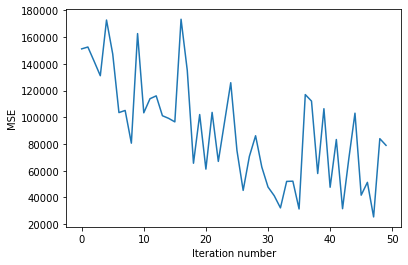

In [265]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

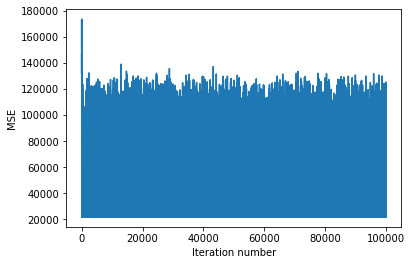

In [266]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [267]:
stoch_grad_desc_weights

array([[ 3.87934503,  3.87934503,  3.87934503,  3.87934503],
       [ 3.14134212,  3.14134212,  3.14134212,  3.14134212],
       [ 0.18323907,  0.18323907,  0.18323907,  0.18323907],
       [13.97836994, 13.97836994, 13.97836994, 13.97836994]])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [268]:
stoch_errors_by_iter[-1]

30293.65860872798

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный ответ округлите до 3 знаков после запятой**

In [270]:
answer4 = mserror(y, np.dot(X, stoch_grad_desc_weights))
print("%.3f" % answer4)

2400.360
